# Weekly Assignment #3

### Objective:

#### Build a linear regression model to predict the log number of shares an article received.
Mashable is an online magazine that focuses on producing viral content. What makes an article go viral, is what we're going to find out in this assignment.

#### 1. Explain how linear regression works
Linear regression is a machine learning algorithm that performs the tast to predict a dependent variable value (Y) based on a given independent variable (X). It is used to find if there is a linear relationship between the X and Y variables.

#### 2. Pre-processing steps 
#### 3. The head () of the resulting data frame

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


df = pd.read_csv('data Mashable.csv')
df = df.dropna()
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


We can see that there are already some dummy variables: data_channel_is_lifestyle, data_channel_is_bus, (I am assuming there are also variables for the other days of the week in the dots) weekday_is_friday,weekday_is_saturday, weekday_is_sunday, is_weekend.
To be honest, 'is_weekend' seems unnecessary to me since you already have saturday and sunday. 

The numbers that seem more interesting to me are the last ones about sentiment, shares and share log.

#### 4. Splitting the dataset into a training and test set

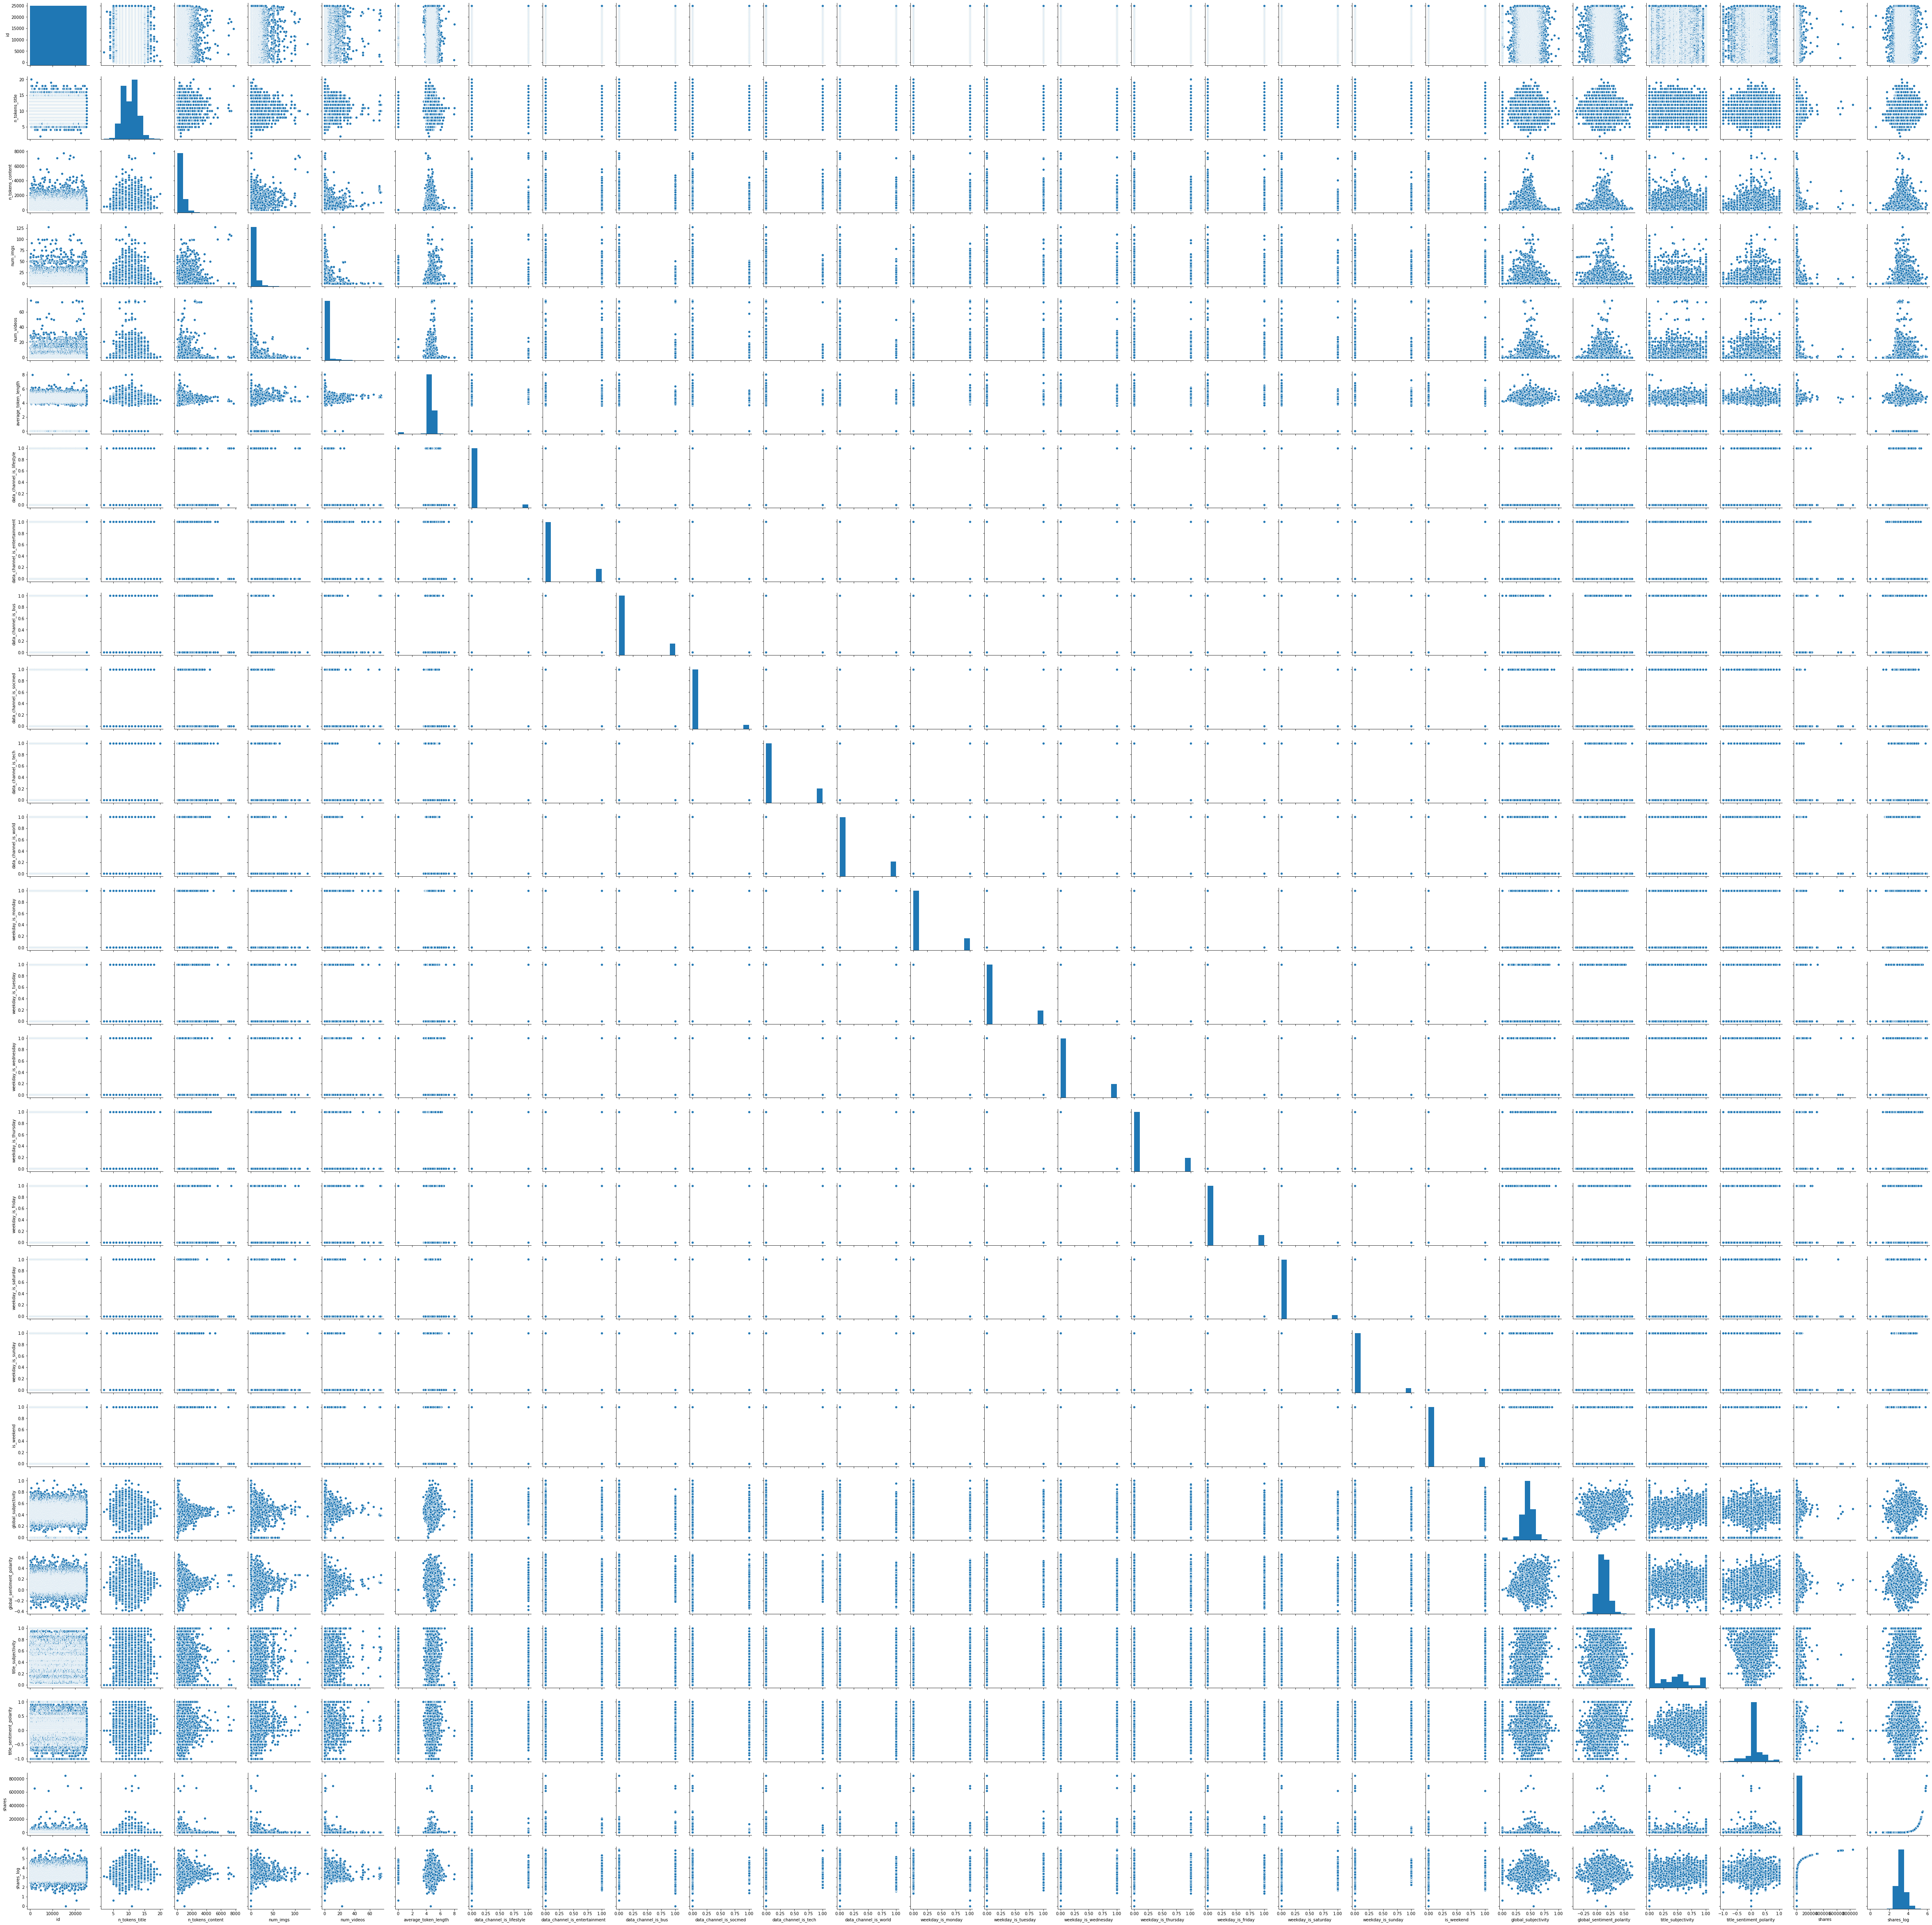

In [3]:
sns.pairplot(df)
plt.show()

#### What do I see?

When you look at the final row, with 'shares_log' on the Y-axis, you see that these variables correlate with it: n_tokens_content, num_imgs, num_videos. You see a somewhat negative linear relationship. I must note that num_imgs is not usable due to the fact that it also includes GIF's which consist of a high number of images. 

The qualitative variables do not show a clear picture. We can make a correlation matrix to make things more clear. Correlations can also be calculated for 0/1 categorical variables.

Let's put them all in a linear model. For sk-learn to work, we first need to create separate X and Y that include only the variables that we want to use.


In [4]:
df.corr()

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


When looking at the last row we see a moderate relation between share_log and shares (0.483322). 
Also, a moderate relationship between n_tokens_content and num_imgs (0.357047). But like I mentioned before, num_imgs is not usable. It's maybe handy to remove it from the dataset. 
Global_sentiment_polarity and Global_subjectivity correlate moderately as well (0.315314).
There is a weak relationship between title_subjectivity and title_sentiment_polarity (0.238629).


#### 4. Split dataset

In [5]:
y = df['shares_log'] #We need to take out the rating as our Y-variable
X = df[['data_channel_is_lifestyle', 'global_subjectivity', 'is_weekend', 'num_imgs','data_channel_is_socmed']] #this slices the dataframe to include all rows and the columns from "data_channel_is_lifestyle" to "shares"
X.index = df['id'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()

,data_channel_is_lifestyle,global_subjectivity,is_weekend,num_imgs,data_channel_is_socmed
id,,,,,
1,0,0.439379,0,12,0
2,0,0.300454,0,6,0
3,0,0.575486,0,0,0
4,0,0.327220,0,2,0
5,0,0.507709,0,18,0


The variables I selected were chosen because together the are quite diverse. The first one is about genre, the second is about overall subjectivity of the article, the third is based on publishing day, the fourth covers images included in the article itself and the last one points out if the article is categorized as social media.  

We now have our X and y, and can start training the model. First, let's split the data into a training set and a test set.

In [6]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,data_channel_is_lifestyle,global_subjectivity,is_weekend,num_imgs,data_channel_is_socmed
id,,,,,
20922,0,0.451711,1,0,0
4486,0,0.476976,0,9,0
17756,0,0.488495,0,1,0
4705,0,0.545746,0,23,0
13494,0,0.507042,0,13,0


#### 5. Create linear regression model to predict the number of shares, using exactly 5 variables

In [7]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

Let's look at the coefficient

In [8]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.067989,data_channel_is_lifestyle
0.288522,global_subjectivity
0.125660,is_weekend
0.003698,num_imgs
0.138785,data_channel_is_socmed




We can interpret these coefficients as follows:
    
    If an article is of the genre lifestyle, it adds 0.07 to its shares_log
    For each global subjectivity score (how subjective is the text?) the shares_log increases with 0.29.
    If an article is published on the weekend, it adds 0.13 to its share_log
    
    For each image in an article, the shares_log increases with 0.012
    For each article categorized as social media, the shares_log increases with 0.14.

Finally, let's look at the model performance. We'll generate predictions and calculate the R^2 and RMSE.

In [9]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.033064631660641886

The R^2 is 0.33, which means 33% of the variation in share_log is explained by the model. Let's calculate the RMSE: the root mean squared error.

In [10]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.3992625140349665

The RMSE is 0.40. Which means that we are typically about 0.40 off in our predicted rating.

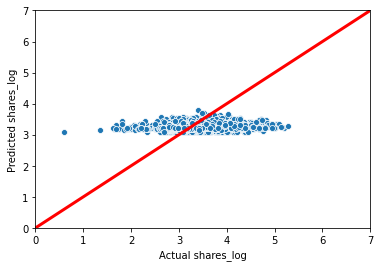

In [16]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares_log')
plt.ylabel('Predicted shares_log')
plt.xlim([0,7]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0,7])
plt.plot([0, 7], [0, 7], color='red', lw=3) #Plot a diagonal length
plt.show()

The predicitons are quite off. There is no linear relationship in the actual shares_log, but it is in our prediciton. Therefore, this model is not really accurate. 